In [28]:
using MLDatasets, DataFrames
include("unsupervised.jl")

# Load Iris dataset
iris = Iris()

dataset Iris:
  metadata   =>    Dict{String, Any} with 4 entries
  features   =>    150×4 DataFrame
  targets    =>    150×1 DataFrame
  dataframe  =>    150×5 DataFrame

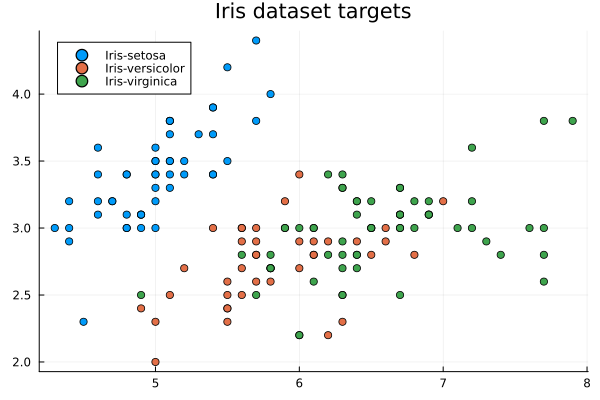

In [29]:
# Plot the data
using Plots
scatter(iris.features[!, :sepalwidth], iris.features[!, :sepallength], group = iris.targets[!, :class], legend = :topleft, title = "Iris dataset targets") 


In [30]:
center, clusters = mountain_clustering(Matrix(iris.features[!,[:sepallength, :sepalwidth]]), 0.5, 0.5, euclidean_distance)

MethodError: MethodError: Cannot `convert` an object of type Tuple{Vector{Any}, Vector{Int64}} to an object of type Vector{Int64}
Closest candidates are:
  convert(::Type{T}, !Matched::LinearAlgebra.Factorization) where T<:AbstractArray at /usr/local/Cellar/julia/1.8.5/share/julia/stdlib/v1.8/LinearAlgebra/src/factorization.jl:58
  convert(::Type{Array{S, N}}, !Matched::PooledArrays.PooledArray{T, R, N}) where {S, T, R, N} at ~/.julia/packages/PooledArrays/DXlaI/src/PooledArrays.jl:499
  convert(::Type{T}, !Matched::AbstractArray) where T<:Array at array.jl:617
  ...